# Linear Model in Python

## Activity

1. Read in the Global Social Indicators data and create a DataFrame.
2. Identify a numeric variable that you want to explain. This is your dependent variable (DV), usually named Y. Describe the variable.
3. Identify a numeric variable that you think might partially explain your DV. This is your independent variable (IV), usually named X. Describe this variable.
4. Compute the linear model (using OLS), using the code in block 3 as a guide.
5. Visualize the linear model, using code in block 4 as a model.
6. Interpret the results. 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt 
import scipy.stats as scp

### Global Social Indicators


In [4]:
GlobalSocialIndicators = pd.read_excel('data/HumanDevelopment.xlsx', index_col='Country', na_values=['NA'])
GlobalSocialIndicators.columns

Index(['HDI Rank', 'Human Development Index (HDI)', 'Life Expectancy at Birth',
       'Expected Years of Education', 'Mean Years of Education',
       'Gross National Income (GNI) per Capita',
       'GNI per Capita Rank Minus HDI Rank'],
      dtype='object')

In [5]:
GlobalSocialIndicators[['HDI Rank', 'Mean Years of Education']].describe()

,HDI Rank,Mean Years of Education
count,188.000000,188.000000
mean,94.313830,8.110106
std,54.431652,3.092782
min,1.000000,1.400000
25%,47.750000,5.575000
50%,94.000000,8.500000
75%,141.250000,10.725000
max,188.000000,13.100000


In [6]:
GlobalSocialIndicators.describe()

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
count,188.000000,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000
mean,94.313830,0.692457,71.105319,12.88617,8.110106,17014.808511,0.186170
std,54.431652,0.154701,8.383277,2.86827,3.092782,18793.634361,17.326139
min,1.000000,0.348000,49.000000,4.10000,1.400000,581.000000,-84.000000
25%,47.750000,0.573750,65.475000,11.10000,5.575000,3690.500000,-9.000000
50%,94.000000,0.724000,73.200000,13.10000,8.500000,10667.000000,1.500000
75%,141.250000,0.816500,76.800000,15.02500,10.725000,22800.500000,11.000000
max,188.000000,0.944000,84.000000,20.20000,13.100000,123124.000000,47.000000


Explaining the variation in Mean Years of Education using Gross National Income (GNI) per Capita as a causal factor.

The model appears to be reliable with an F-test well below 5% at 1.35e-17. The model also appears to be a reasonably good fit with 32% of the variation in mean years of education explained by a country's GNI.

For every $100,000 additional in GNI we expect an additional .9 mean years of education.

In [11]:
Y = GlobalSocialIndicators['Mean Years of Education']
X = GlobalSocialIndicators['Gross National Income (GNI) per Capita']
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                               OLS Regression Results                              
Dep. Variable:     Mean Years of Education   R-squared:                       0.325
Model:                                 OLS   Adj. R-squared:                  0.321
Method:                      Least Squares   F-statistic:                     89.56
Date:                     Wed, 19 Oct 2022   Prob (F-statistic):           1.35e-17
Time:                             15:00:56   Log-Likelihood:                -441.58
No. Observations:                      188   AIC:                             887.2
Df Residuals:                          186   BIC:                             893.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


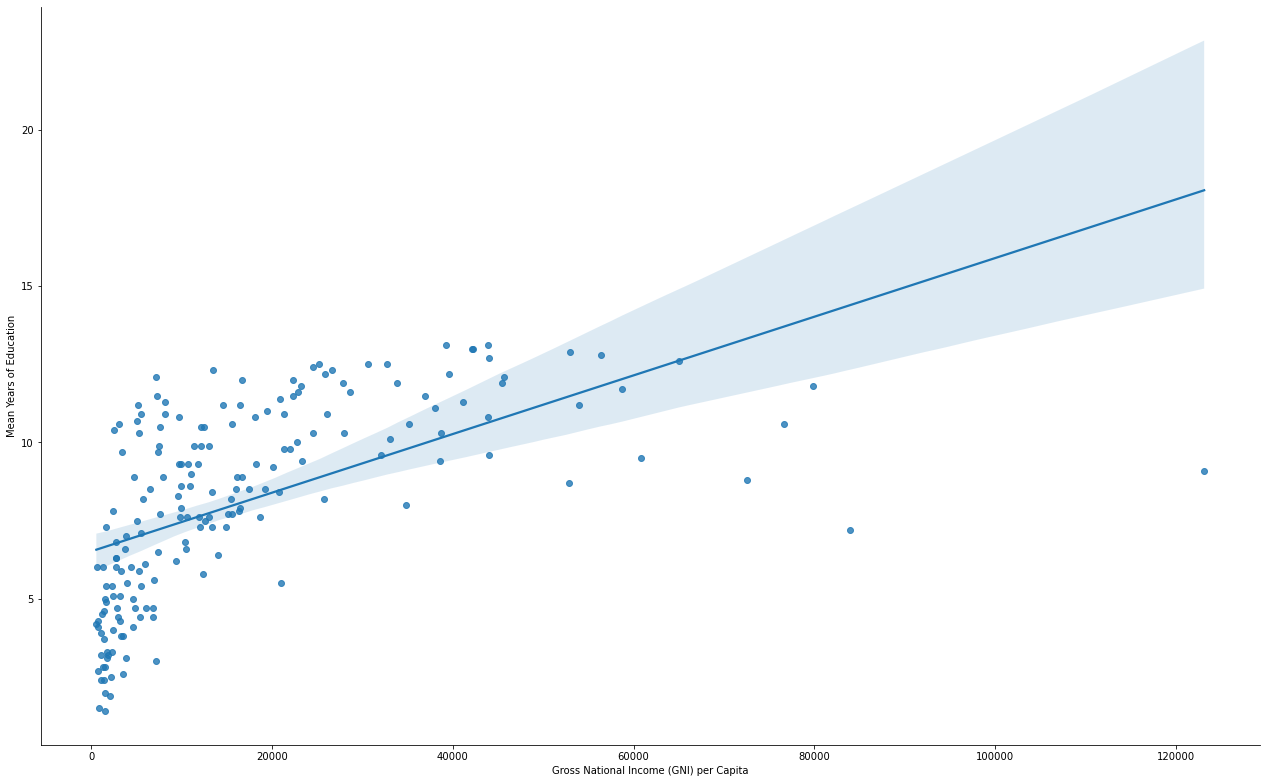

In [12]:
p = sb.lmplot('Gross National Income (GNI) per Capita', 'Mean Years of Education', data=GlobalSocialIndicators)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.show()